# Correlation and Regression

Just some code related to these topics for lecture examples


In [1]:


# General useful imports


import numpy as np
from numpy import arange,linspace,mean, var, std
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from numpy.random import random, randint, uniform, choice, binomial, geometric, poisson, exponential, normal 
from numpy.linalg import inv
import math
from collections import Counter
import pandas as pd
%matplotlib inline


# Numpy basic stats functions

# https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html


X = [1,2,3]

# mean of a list
mean(X)

# population variance
var(X)

# sample variance
var(X,ddof=1)

# population standard deviation
std(X)

# sample standard deviation
std(X,ddof=1)


# Scipy statistical functions

from scipy.stats import norm,expon, pearsonr

# Calculation the correlation coefficient rho(X,Y)

def rho(X,Y):
    return pearsonr(X,Y)[0]

# https://docs.scipy.org/doc/scipy/reference/stats.html

# given random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 40

#a. Find P(X<50)
norm.cdf(x=50,loc=60,scale=40) # 0.4012936743170763

#b. Find P(X>50)
norm.sf(x=50,loc=60,scale=40) # 0.5987063256829237

#c. Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

#d. how much top most 5% expensive house cost at least? or find x where P(X>x) = 0.05
norm.isf(q=0.05,loc=60,scale=40)

#e. how much top most 5% cheapest house cost at least? or find x where P(X<x) = 0.05
norm.ppf(q=0.05,loc=60,scale=40)

#f give the endpoints of the range for the central alpha percent of the distribution
norm.interval(alpha=0.3, loc=60, scale=140)

# Same for exponential distribution
beta = 5    # mean of distribution

expon.pdf(x=3,loc=0,scale=beta)       # don't change loc = starting point

# functions from numpy.random library

# https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

#g generate random variates from a normal distribution
normal(loc=60,scale=40,size=10)

#h generate random variates from a poisson distribution with rate parameter lam(bda)
poisson(lam=2,size=10)

#i generate random variates from an exponential distribution
# scale = beta = mean of distribution; beta = 1 / lambda    (lambda = rate parameter)
exponential(scale=5,size=100)

# Utility functions

# Round to 4 decimal places
def round4(x):
    return round(float(x)+0.00000000001,4)

def round4List(X):
    return [round(float(x)+0.00000000001,4) for x in X]

# Correlation


X = [1, 1, 0, 0]
Y = [2, 1, 1, 0]


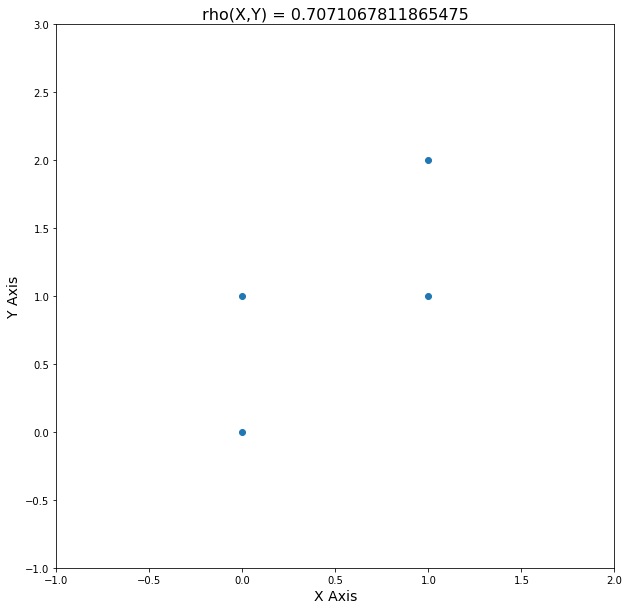


X = [1, 2, 3, 4]
Y = [1, 2, 3, 4]


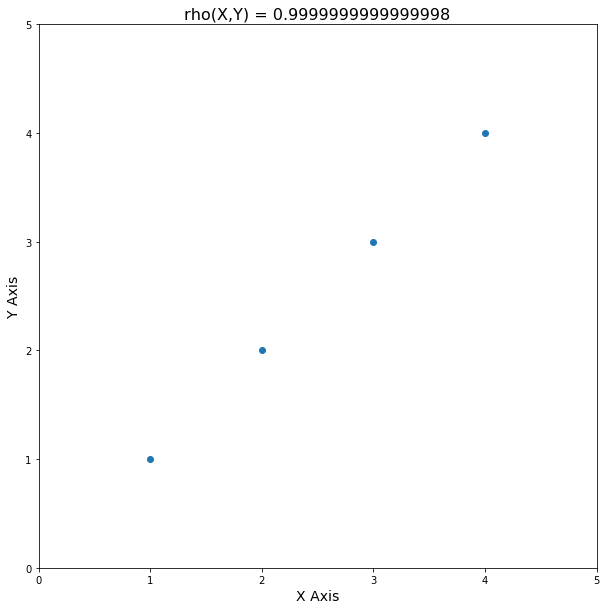


X = [1, 2, 3, 4]
Y = [4, 3, 2, 1]


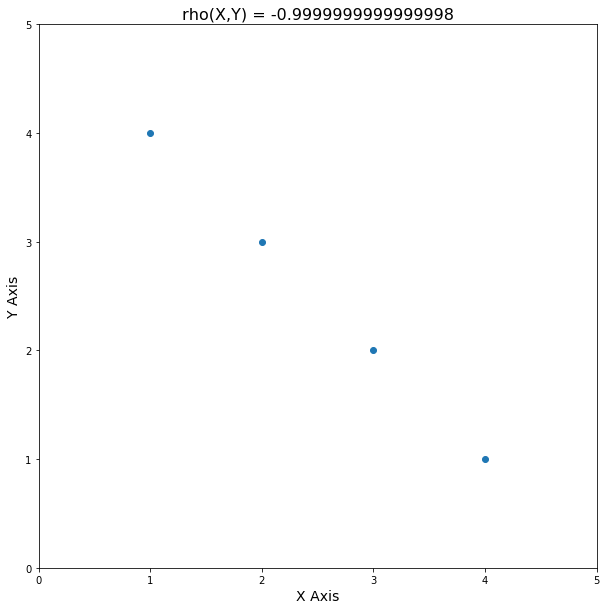


X = [1, 2, 3, 4]
Y = [2, 4, 6, 8]


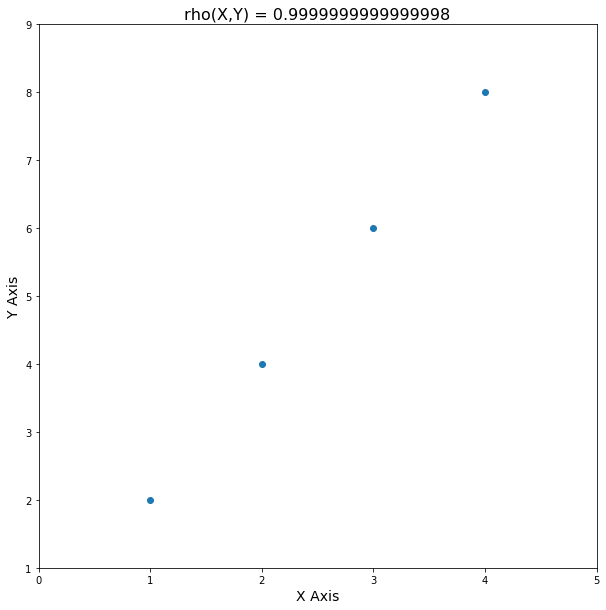


X = [1, 2, 3, 4]
Y = [1, 1.1, 1.2, 1.3]


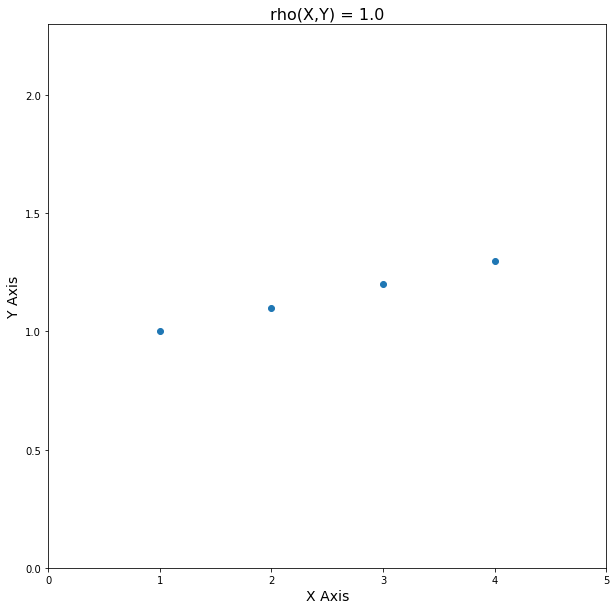


X = [1, 2, 3, 4]
Y = [2, 2, 2, 2]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


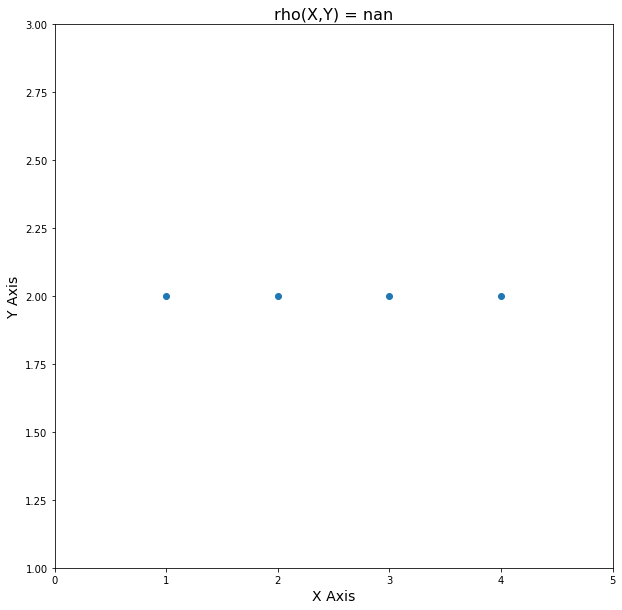


X = [2, 2, 2, 2]
Y = [1, 2, 3, 4]


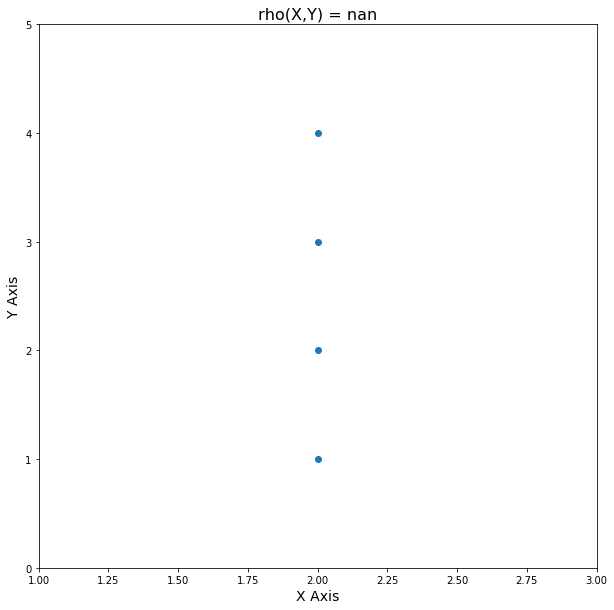


X = [0, 1, 2, 3]
Y = [0, 2, 4, 3]


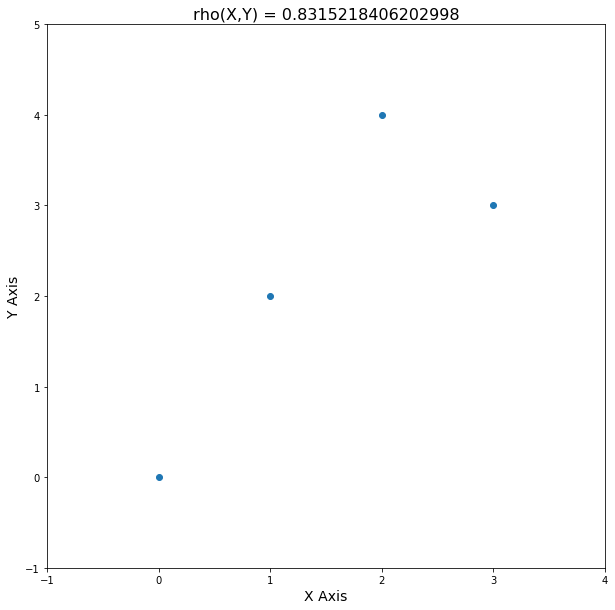


X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


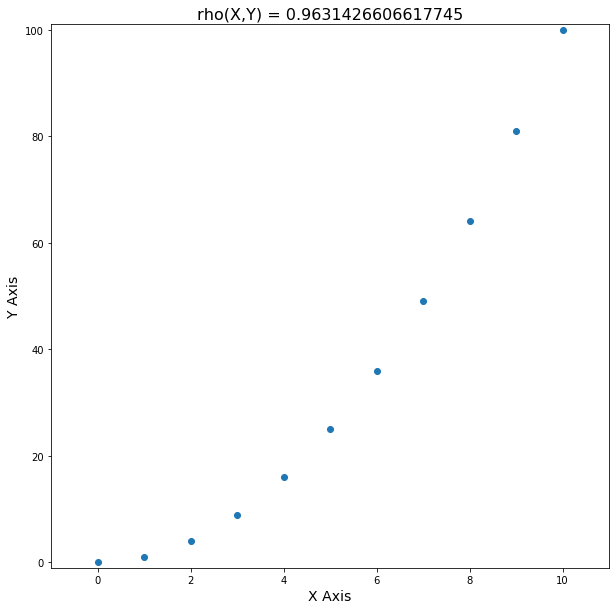


X = [-1, -1, 1, 1]
Y = [-1, 1, -1, 1]


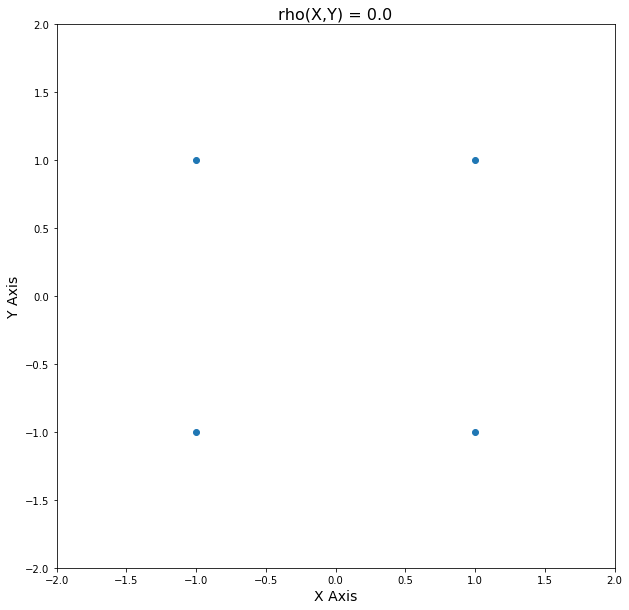

In [2]:
def rho(x,y):
    mux = mean(x)
    muy = mean(y)
    sdx = std(x)
    sdy = std(y)
    
    sum = 0
    for i in range(len(x)):
        sum += x[i]*y[i]
    expXY = sum/len(x)

    return (expXY - mux*muy)/(sdx*sdy)

def displayXY(X,Y):
    print()
    print("X = " + str(X))
    print("Y = " + str(Y))
    fig = plt.figure(figsize=(10,10))
    xlo = min(X)-1
    xhi = max(X)+1
    ylo = min(Y)-1
    yhi = max(Y)+1
    plt.axis([xlo,xhi,ylo,yhi])
    plt.title("rho(X,Y) = " + str(rho(X,Y)), fontsize=16)
    #plt.title("Midpoint of Joint Random Variable")
    plt.xlabel("X Axis", fontsize=14)
    plt.ylabel("Y Axis", fontsize=14)
    if(len(X) > 20):
        m = "+"
    else:
        m = "o"
    plt.scatter(X,Y, marker=m)
    #plt.plot([mean(X)],[mean(Y)],'rD')
    plt.show()

    
def ex0():
    X = [1,1,0,0]
    Y = [2,1,1,0]
    displayXY(X,Y)

def ex1():
    X = [1,2,3,4]
    Y = [1,2,3,4]
    displayXY(X,Y)
    
def ex2():
    X = [1,2,3,4]
    Y = [4,3,2,1]
    displayXY(X,Y)
    
def ex3():
    X = [1,2,3,4]
    Y = [2,4,6,8]
    displayXY(X,Y)
    
def ex4():
    X = [1,2,3,4]
    Y = [1,1.1,1.2,1.3]
    displayXY(X,Y)
    
def ex5():
    X = [1,2,3,4]
    Y = [2,2,2,2]
    displayXY(X,Y)
    
def ex5b():
    X = [2,2,2,2]
    Y = [1,2,3,4]
    displayXY(X,Y)
    
def ex6():
    X = [0,1,2,3]
    Y = [0,2,4,3]
    displayXY(X,Y)
    
def ex7():
    X = [0,1,2,3,4,5,6,7,8,9,10]
    Y = [0,1,4,9,16,25,36,49,64,81,100]
    displayXY(X,Y)
    
def ex8():
    X = [-1,-1,1,1]
    Y = [-1,1,-1,1]
    displayXY(X,Y)
    
def ex9():
    X = []
    Y = []
    displayXY(X,Y)

 
ex0()

ex1()

ex2()

ex3()

ex4()

ex5()

ex5b()

ex6()

ex7()

ex8()


print()


X = [10, 11, 12, 16, 17, 10, 12, 16, 15, 5, 15, 13, 12, 8, 18, 17, 15, 10, 16, 16, 13, 11, 10, 6, 12, 15, 3, 16, 16, 13, 2, 5, 15, 14, 15, 16, 15, 16, 15, 16, 17, 1, 16, 3, 8, 15, 12, 1, 17, 16, 12, 11, 16, 16, 12, 17, 10, 13, 16, 17, 12, 13, 15, 16, 7, 18, 14, 5, 15, 18, 5, 15, 17, 14, 16, 14, 6, 5, 13, 17]
Y = [98, 98, 97, 96, 93, 93, 93, 92, 92, 91, 91, 91, 90, 89, 89, 88, 86, 85, 85, 84, 83, 83, 83, 82, 81, 80, 80, 80, 80, 80, 80, 79, 78, 78, 76, 76, 75, 75, 73, 73, 71, 71, 71, 71, 69, 68, 68, 67, 67, 67, 66, 64, 63, 63, 62, 62, 61, 61, 61, 60, 60, 59, 56, 56, 56, 55, 54, 54, 53, 53, 53, 51, 47, 46, 43, 43, 43, 38, 35, 27]


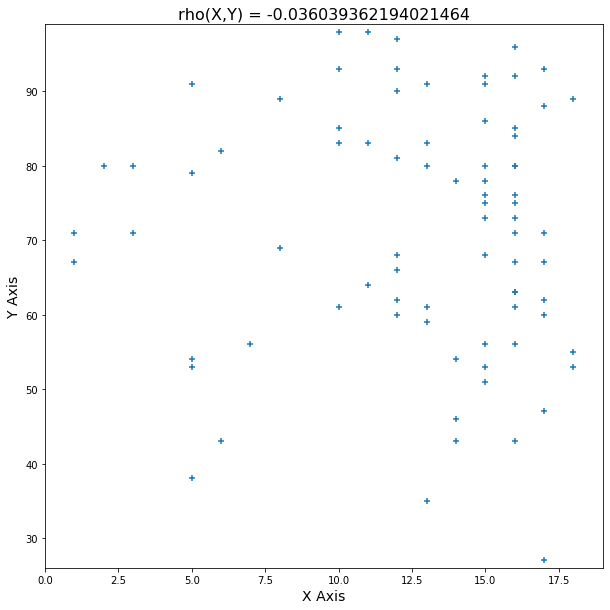

In [3]:
# Midterm Data   X = how many minutes after noon turned in   Y = score

midtermY = [98, 98, 97, 96, 93, 93, 93, 92, 92, 91, 91, 91, 90, 89, 89, 88, 86, 
     85, 85, 84, 83, 83, 83, 82, 81, 80, 80, 80, 80, 80, 80, 79, 78, 78, 
     76, 76, 75, 75, 73, 73, 71, 71, 71, 71, 69, 68, 68, 67, 67, 67, 66, 
     64, 63, 63, 62, 62, 61, 61, 61, 60, 60, 59, 56, 56, 56, 55, 54, 54, 
     53, 53, 53, 51, 47, 46, 43, 43, 43, 38, 35, 27]

midtermX = [10, 11, 12, 16, 17, 10, 12, 16, 15, 5,  15, 13, 12, 8,  18, 17, 15, 
     10, 16, 16, 13, 11, 10, 6,  12, 15, 3,  16, 16, 13, 2,  5,  15, 14, 15, 
     16, 15, 16, 15, 16, 17, 1,  16, 3,  8,  15, 12, 1,  17, 16, 12, 11, 16, 
     16, 12, 17, 10, 13, 16, 17, 12, 13, 15, 16, 7,  18, 14, 5,  15, 18, 5, 
     15, 17, 14, 16, 14, 6, 5, 13, 17]

displayXY(midtermX,midtermY)


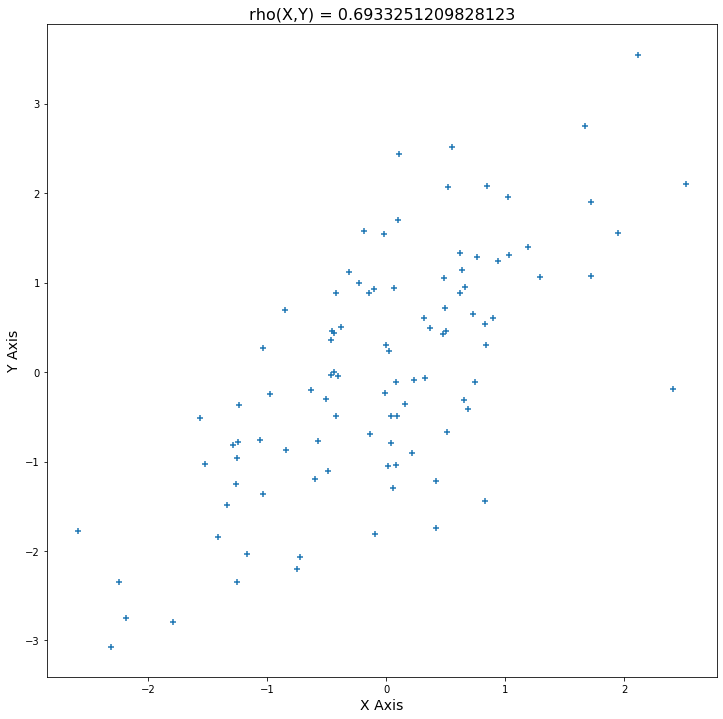

In [4]:
# This generates a joint random variable consisting of two independent
# standard normal distributions

def jointNormal(num_trials):
    X = normal(size=num_trials)
#    X = uniform(size=num_trials)
#    X = exponential(3,size=num_trials)
    Y = X + normal(size=num_trials)
#    Y = uniform(size=num_trials)
#    Y = exponential(3,size=num_trials)
    return (X,Y)


num_trials = 100
(X,Y) = jointNormal(num_trials)

print()
fig = plt.figure(figsize=(12,12))

plt.title("rho(X,Y) = " + str(rho(X,Y)), fontsize=16)
plt.xlabel("X Axis", fontsize=14)
plt.ylabel("Y Axis", fontsize=14)

plt.scatter(X,Y, marker="+")
plt.show()



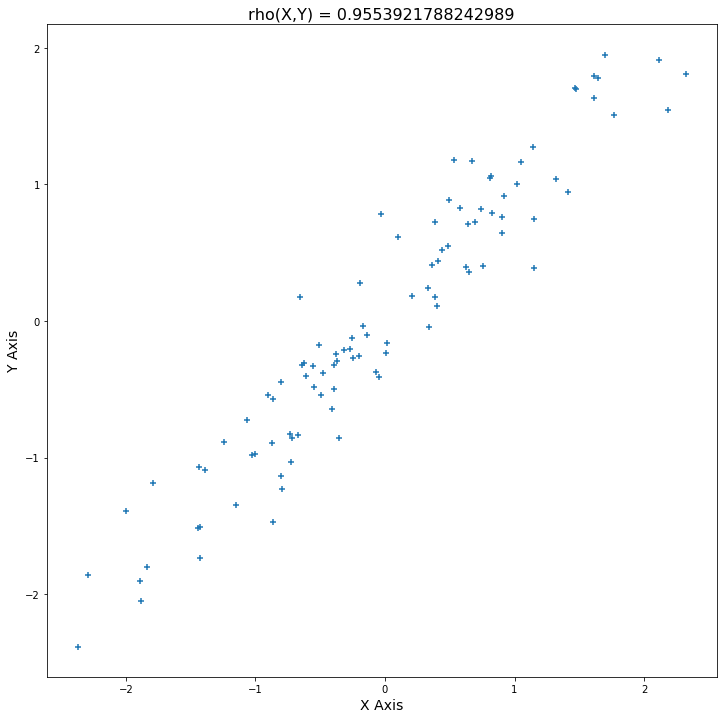

In [5]:
# This generates a joint random variable consisting of two independent
# standard normal distributions

def jointNormal(num_trials):
    Y = normal(size=num_trials)
#     Y = uniform(size=num_trials)
#    X = exponential(3,size=num_trials)
    X = Y + normal(0,0.3,size=num_trials)
#    Y = uniform(size=num_trials)
#     Y = exponential(3,size=num_trials)
    return (X,Y)


num_trials = 100
(X,Y) = jointNormal(num_trials)

print()
fig = plt.figure(figsize=(12,12))

plt.title("rho(X,Y) = " + str(rho(X,Y)), fontsize=16)
plt.xlabel("X Axis", fontsize=14)
plt.ylabel("Y Axis", fontsize=14)
plt.scatter(X,Y, marker="+")
plt.show()

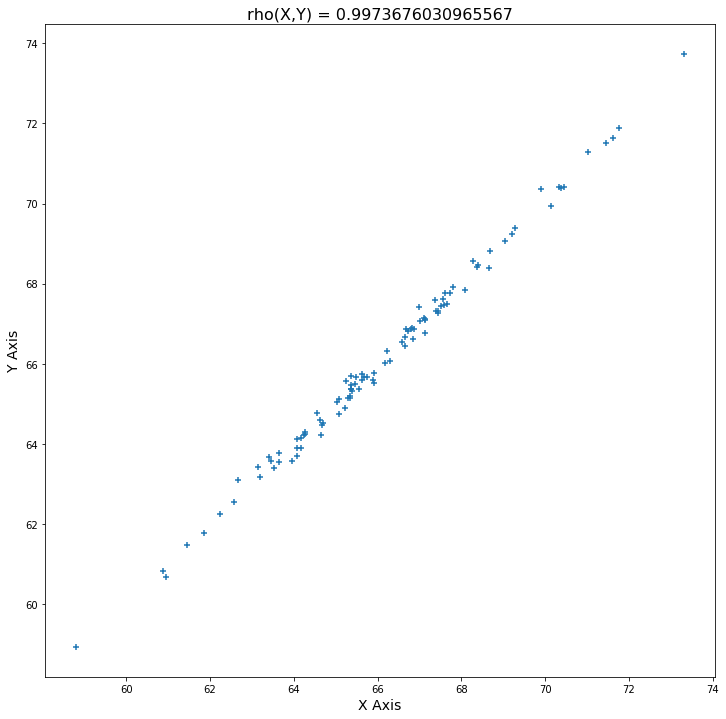

In [6]:
def jointNormal(sigma,num_trials):
    X = normal(loc=66,scale=2.5,size=num_trials)
    E = normal(loc=0,scale=sigma/50,size=num_trials)
    Y = X+E
    return (X,Y)

sigma_errors = 10
num_trials = 100
(X,Y) = jointNormal(sigma_errors,num_trials)
print()
fig = plt.figure(figsize=(12,12))

plt.title("rho(X,Y) = " + str(rho(X,Y)), fontsize=16)
plt.xlabel("X Axis", fontsize=14)
plt.ylabel("Y Axis", fontsize=14)

# plt.scatter(X,X, marker="+")
plt.scatter(X,Y, marker="+")

# Linear Regression Lines

expXY =  657.698171  r =  0.9817096149807651  sdy =  3.8008871465093512  sdx =  6.393778225744148  m =  0.583593506912848  b =  -19.084408957348742


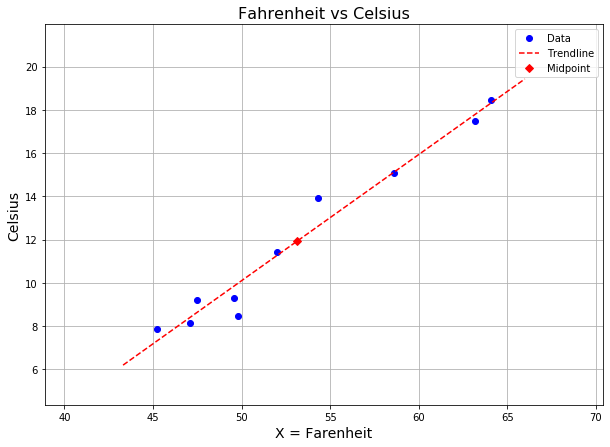


mean(x):	53.14	std(x):	6.3938
mean(y):	11.9278	std(y):	3.8009

rho:   0.9817	r^2:   0.9638

Residual SS:   5.2364	Regression SS: 139.231	Total SS:   144.4674

Regression Line: y = 0.5836 * x - 19.0844


Example 0
expXY =  1.3333333333333333  r =  -0.5  sdy =  0.9428090415820634  sdx =  0.9428090415820634  m =  -0.5  b =  2.0


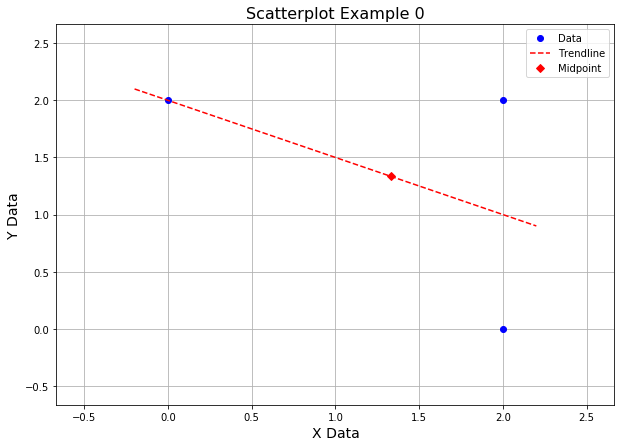


mean(x):	1.3333	std(x):	0.9428
mean(y):	1.3333	std(y):	0.9428

rho:   -0.5	r^2:   0.25

Residual SS:   2.0	Regression SS: 0.6667	Total SS:   2.6667

Regression Line: y = -0.5 * x + 2.0


Example 1
expXY =  51.166666666666664  r =  0.9341987329938244  sdy =  1.4907119849998596  sdx =  0.9574271077563381  m =  1.4545454545454493  b =  -1.7878787878787525


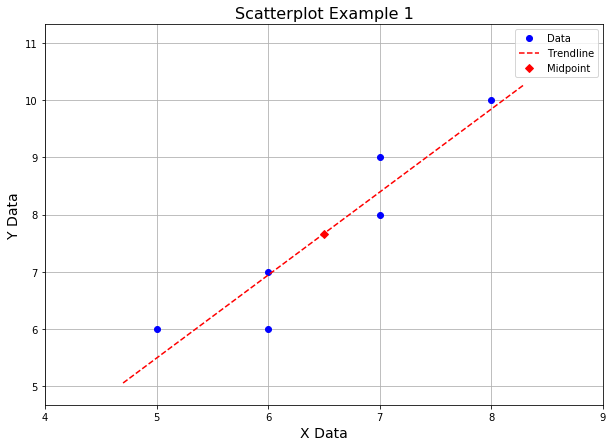


mean(x):	6.5	std(x):	0.9574
mean(y):	7.6667	std(y):	1.4907

rho:   0.9342	r^2:   0.8727

Residual SS:   1.697	Regression SS: 11.6364	Total SS:   13.3333

Regression Line: y = 1.4545 * x - 1.7879


Example 2
expXY =  204.54285714285717  r =  -0.9561729214532635  sdy =  2.221784537396065  sdx =  7.1799039275023215  m =  -0.29588281868566774  b =  17.80926365795719


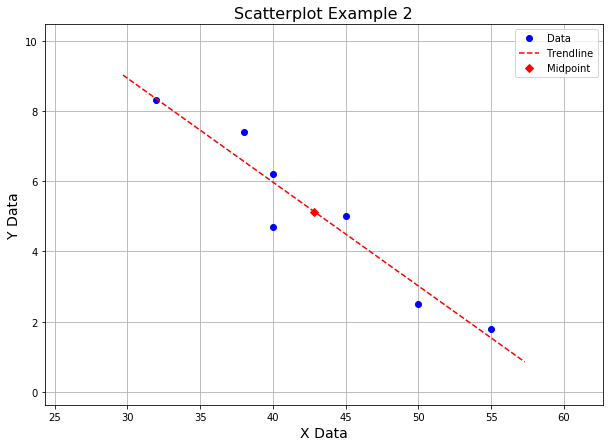


mean(x):	42.8571	std(x):	7.1799
mean(y):	5.1286	std(y):	2.2218

rho:   -0.9562	r^2:   0.9143

Residual SS:   2.9625	Regression SS: 31.5918	Total SS:   34.5543

Regression Line: y = -0.2959 * x + 17.8093


Example 3
expXY =  8651.676101934267  r =  0.502858520602879  sdy =  11.66066434332078  sdx =  1.9016407372498432  m =  3.0834764454031798  b =  -82.57574306455548


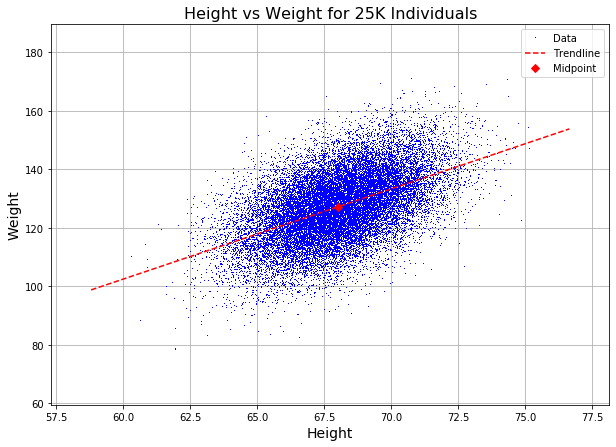


mean(x):	67.9931	std(x):	1.9016
mean(y):	127.0794	std(y):	11.6607

rho:   0.5029	r^2:   0.2529

Residual SS:   2539713.3122	Regression SS: 859564.011	Total SS:   3399277.3232

Regression Line: y = 3.0835 * x - 82.5757


Midterm Data
expXY =  894.6  r =  -0.036039362194021464  sdy =  16.447449460326666  sdx =  4.422933839658921  m =  -0.13401864232142494  b =  72.82781012627898


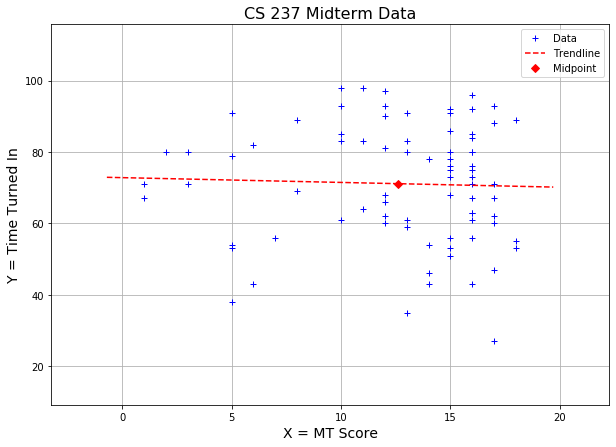


mean(x):	12.6125	std(x):	4.4229
mean(y):	71.1375	std(y):	16.4474

rho:   -0.036	r^2:   0.0013

Residual SS:   21613.3788	Regression SS: 28.1087	Total SS:   21641.4875

Regression Line: y = -0.134 * x + 72.8278


In [9]:
# Draw scatterplot for bivariate data and draw linear regression line
# with midpoint (mux,muy)
    
def ScatterTrendline(X,Y,titl="Scatterplot with Trendline", xlab="X",ylab="Y",showResiduals=False):
    

    
    n = len(X)
    
    # basic 
    mux = mean(X)
    muy = mean(Y)
 #   sdx = std(X,ddof=1)
 #   sdy = std(Y,ddof=1)
    sdx = std(X)
    sdy = std(Y)
        
    expXY = sum( [X[i]*Y[i] for i in range(n)] ) / n
    r = (expXY - mux*muy)/(sdx*sdy)
    
    r2 = r**2
       
    m = r * sdy / sdx
    b = muy - m*mux

    print("expXY = ", expXY, " r = ", r,  " sdy = ", sdy, " sdx = ", sdx, " m = ", m, " b = ", b)
    # Predicted values from regression line
    
    Yhat = [(m*X[i]+b) for i in range(n)]
    
    # Residuals
    
    E = [(Y[i] - Yhat[i]) for i in range(n)]
    
    # residual sum of squares -- deviations of data from line
    rss = sum( [ e**2 for e in E])
    
    # regression sum of squares -- deviation of line from mean of y
    regss = sum( [ (Yhat[i] - muy)**2 for i in range(n)])
    
    # total sum of squares -- deviation of data from mean of y
    tss = sum( [ (Y[i] - muy)**2 for i in range(n)] )
     
    # alternate way to compute r^2 statistic
    
    #r2 = regss / tss

    if(n < 20):
        fmt = 'bo'
        fmt2 = 'o'
        bord = 3
    elif(n < 100):
        fmt = 'b+'
        fmt2 = '+'
        bord = 4
    else:
        fmt = 'b,'
        fmt2 = '.'
        bord = 5
    
    # set axes so border around data
    
    minx = min(X)
    miny = min(Y)
    maxx = max(X)
    maxy = max(Y)
    maxe = max(E)
    mine = min(E)
    
    xran = maxx - minx
    yran = maxy - miny
    eran = maxe - mine
    xlo = minx - xran/bord
    xhi = maxx + xran/bord
    ylo = miny - yran/bord
    yhi = maxy + yran/bord
    elo = mine - eran/bord
    ehi = maxe + eran/bord
    
    plt.figure(figsize=(10,7))
    plt.axis([xlo,xhi,ylo,yhi])
    
    linex = [(minx-xran/10),(maxx+xran/10)]
    liney = [(m*x+b) for x in linex]

    plt.plot(X,Y, fmt,linex,liney,'r--',[mux],[muy],'rD')
    plt.grid()
    plt.title(titl,fontsize=16)
    plt.legend(["Data","Trendline","Midpoint"],loc='best')
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.show()

    if showResiduals:
        plt.figure(figsize=(10,5))
        plt.axis([xlo,xhi,elo,ehi])
        plt.scatter(X,E,marker=fmt2)
        plt.plot([xlo,xhi],[0,0],'--', color='k')
        plt.title("Residual Plot",fontsize=16)
        plt.xlabel("X",fontsize=14)
        plt.ylabel("Residuals",fontsize=14)
        plt.show()


    print("\nmean(x):\t" + str(round4(mux)) + "\tstd(x):\t" + str(round4(sdx)))
    print("mean(y):\t" + str(round4(muy)) + "\tstd(y):\t" + str(round4(sdy)))
    print("\nrho:   " + str(round4(r)) + "\tr^2:   " + str(round4(r2)))
    print("\nResidual SS:   " + str(round4(rss)) + "\tRegression SS: " + str(round4(regss)) + "\tTotal SS:   " + str(round4(tss)))    
    
    if(b >= 0):
        print("\nRegression Line: y = " + str(round4(m)) + " * x + " + str(round4(b)))
    else:
        print("\nRegression Line: y = " + str(round4(m)) + " * x - " + str(round4(-b)))       

    
def Ex0():
    x = [0,2,2]
    y = [2,0,2]
    ScatterTrendline(x,y,titl="Scatterplot Example 0",xlab="X Data", ylab="Y Data")
    
    
    
def Ex1():
    x = [5,6,6,7,7,8]
    y = [6,6,7,8,9,10]
    ScatterTrendline(x,y,titl="Scatterplot Example 1",xlab="X Data", ylab="Y Data")
    
    
def Ex2():
#    x,y = getBioMetricData()
    x = [50,45,40,38,32,40,55]
    y = [2.5,5.0,6.2,7.4,8.3,4.7,1.8]
    ScatterTrendline(x,y,"Scatterplot Example 2","X Data", "Y Data")
    
    
def Ex3():
    studs = pd.read_csv("https://www.cs.bu.edu/fac/snyder/cs237/Data/biometricdata.csv")
    x = [0]*len(studs)
    y = [0]*len(studs)
    for i in range(len(studs)):
        x[i] = studs['Height'][i]
        y[i] = studs['Weight'][i]
    ScatterTrendline(x,y,"Height vs Weight for 25K Individuals","Height", "Weight")

def Ex4():
    studs = pd.read_csv("https://www.cs.bu.edu/fac/snyder/cs237/Data/StudentData3.csv")
    x = [0]*len(studs)
    y = [0]*len(studs)
    for i in range(len(studs)):
        x[i] = studs['SAT_TOTAL'][i]
        y[i] = studs['BU_GPA'][i]
    ScatterTrendline(x,y,titl="SAT vs GPA", xlab="X = Sat Total",ylab="Y = BU GPA")
    
def Ex5():
    studs = pd.read_csv("https://www.cs.bu.edu/fac/snyder/cs237/Data/StudentData3.csv")
    x = [0]*len(studs)
    y = [0]*len(studs)
    for i in range(len(studs)):
        x[i] = studs['HS_GPA'][i]
        y[i] = studs['BU_GPA'][i]
    ScatterTrendline(x,y,titl="HS GPA vs BU GPA", xlab="X = HS GPA",ylab="Y = BU GPA")

def midterm():
    ScatterTrendline(midtermX,midtermY,titl="CS 237 Midterm Data", xlab="X = MT Score",ylab="Y = Time Turned In")

X = [45.2, 47.1, 47.5, 49.6, 49.8, 52.0, 54.3, 58.6, 63.2, 64.1] 
Y = [7.8752, 8.117, 9.2009, 9.3167, 8.4564, 11.4075, 13.9236, 15.0762, 17.4678, 18.4362]

ScatterTrendline(X,Y,"Fahrenheit vs Celsius",xlab="X = Farenheit",ylab="Celsius")

print("\n\nExample 0")  
Ex0()    
print("\n\nExample 1")  
Ex1()
print("\n\nExample 2")
Ex2()
print("\n\nExample 3")
Ex3()
print("\n\nMidterm Data")
midterm()



expXY =  0.5  r =  -0.7071067811865475  sdy =  1.0  sdx =  0.7071067811865476  m =  -0.9999999999999999  b =  2.0


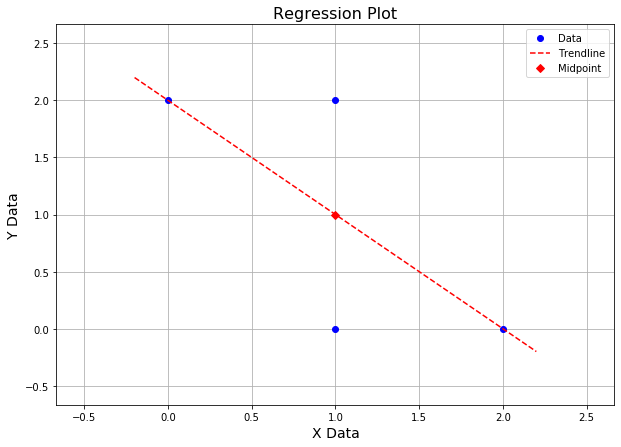


mean(x):	1.0	std(x):	0.7071
mean(y):	1.0	std(y):	1.0

rho:   -0.7071	r^2:   0.5

Residual SS:   2.0	Regression SS: 2.0	Total SS:   4.0

Regression Line: y = -1.0 * x + 2.0


In [10]:
x = [2,0,1,1]
y = [0,2,2,0]
ScatterTrendline(x,y,titl="Regression Plot",xlab="X Data", ylab="Y Data")
    

$${\hat Y} = \{\,  {\hat y}_0,\, {\hat y}_1,\,  {\hat y}_2,\,  {\hat y}_3\,\}      $$

$$\rho(X,Y)$$

expXY =  3.0  r =  0.7071067811865475  sdy =  1.4142135623730951  sdx =  1.0  m =  1.0  b =  1.0


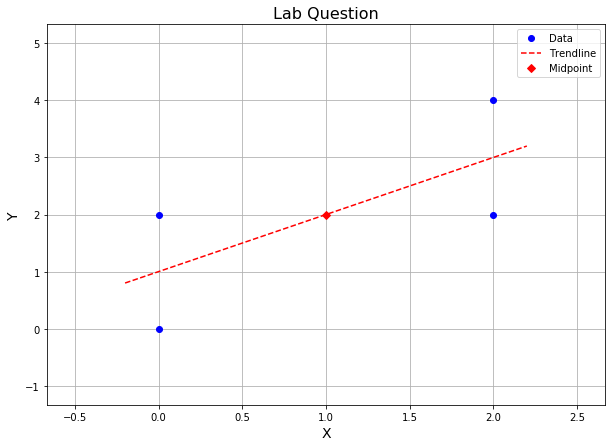


mean(x):	1.0	std(x):	1.0
mean(y):	2.0	std(y):	1.4142

rho:   0.7071	r^2:   0.5

Residual SS:   4.0	Regression SS: 4.0	Total SS:   8.0

Regression Line: y = 1.0 * x + 1.0


In [11]:
X = [0,0,2,2]
Y = [0,2,2,4]
ScatterTrendline(X,Y,"Lab Question",xlab="X",ylab="Y")

expXY =  0.25  r =  -0.7071067811865475  sdy =  0.5  sdx =  0.7071067811865476  m =  -0.49999999999999994  b =  1.0


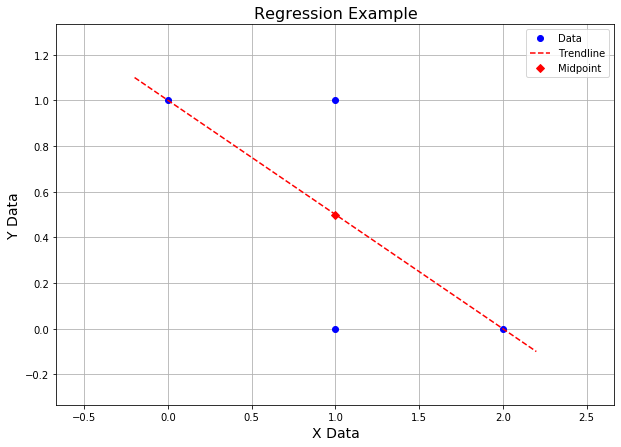


mean(x):	1.0	std(x):	0.7071
mean(y):	0.5	std(y):	0.5

rho:   -0.7071	r^2:   0.5

Residual SS:   0.5	Regression SS: 0.5	Total SS:   1.0

Regression Line: y = -0.5 * x + 1.0


In [12]:

x = [0,0,2,2]
y = [0,2,2,4]

x = [0,2,1,1]
y = [1,0,1,0]
          

ScatterTrendline(x,y,titl="Regression Example",xlab="X Data", ylab="Y Data")
    

# Simple Linear Regression: Building a Linear Model

Linear Regression is the process of constructing a model for a bivariate random variable (X,Y) which shows a linear relationship between X (the independent variable) and Y (the dependent variable). It is assumed that the values taken on by Y are mostly explained by a linear relationship between X and Y with some variation explained as errors (random deviations from the linear model). 

For example, suppose we have two thermometers which measure the daily temperature, one in Farenheit and one in Celsius. We take 10 measurements on 10 different days, obtaining the following pairs of values (X is the Farenheit measurements and Y is the Celsius), which for convenience we have sorted along the X axis:

<pre>
[(45.2, 7.8752), (47.1, 8.117), (47.5, 9.2009), (49.6, 9.3167), (49.8, 8.4564), (52.0, 11.4075), (54.3, 13.9236), (58.6, 15.0762), (63.2, 17.4678), (64.1, 18.4362)]
</pre>

and which correspond to the following lists of measurements:


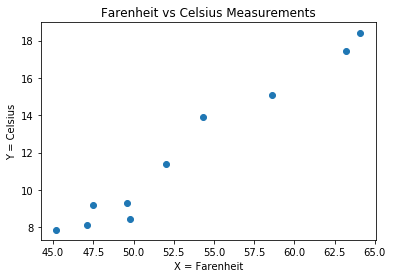

In [13]:
X = [45.2, 47.1, 47.5, 49.6, 49.8, 52.0, 54.3, 58.6, 63.2, 64.1] 
Y = [7.8752, 8.117, 9.2009, 9.3167, 8.4564, 11.4075, 13.9236, 15.0762, 17.4678, 18.4362]

plt.title("Farenheit vs Celsius Measurements")
plt.xlabel("X = Farenheit")
plt.ylabel("Y = Celsius")
plt.scatter(X,Y)
print()

Now we know that ideally there is a perfect linear relationship between these two, expressed by the formula for a line: 

$$y = \theta_0 + \theta_1 x$$

with $\theta_1 = 0.5556$ and $\theta_0 = -17.7778.$  We can think of this as a <i>model</i> of the data. 

<i> But suppose we don't know this model and are trying to determine the model from the data.</i> The problem is that the data is "noisy" and contains errors (due to the thermometers and our ability to read them), and so the actual data will not follow this linear relationship. 

A common assumption, which we will follow here, is that errors follow a normal distribution with mean 0 and an unknown standard deviation $\sigma.$

Therefore we will assume we have a linear model of the relationship with unknown parameters; when we have quantities we are estimating, we will indicate the actual (usually unknown) parameter by $\theta$ (possibly subscripted) and the estimate by $\hat\theta.$
So we are trying to find a model

$$\hat Y = \hat\theta_0 + \hat\theta_1 X$$

which best fits the data, by determining $\hat\theta_0$ and $\hat\theta_1$. 

Once we estimate these parameters, we can then calculate the errors, or residuals, from this
model:

$$y_i = \hat\theta_0 + \hat\theta_1 x_i + e_i$$ 

with the errors distributed normally as $e_i\sim N(0,\sigma^2)$ for $ i=1,\ldots n.$ The goal of Linear Regression, of course, is to determine the parameters $\hat\theta_1$ and $\hat\theta_0$ which minimize the sum of the squares of the errors, the Residual Sum of Squares (RSS):

$$RSS  =  \sum_{i=1}^n e_i^2.$$

This is, of course, the problem that Linear Regression solves. Using techniques from the last lecture, we find that the linear regression line for this data would be

$$\hat y =  -19.0844 + 0.5836 * x$$

The symbol $\hat y$ indicates that the value for y has been estimated, hence, we have
a set of estimated values for y:

$$ \hat Y = [ (-19.0844 + 0.5836 * x) \hbox{ for } x \hbox{ in } X ]$$

that is,

$$\hat Y = [7.3353, 8.391, 8.6132, 9.8355, 9.8911, 11.1134, 12.3913, 14.7804, 17.3361, 17.8362].$$

In other words, our estimates for the actual (unknown) parameters are

$$\hat\theta_0 = -19.22$$

and

$$\hat\theta_1  = 0.583$$

which are estimates from our data of the true (unknown) parameters:

$$\theta_0 = -17.7778.$$ 

and

$$\theta_1 = 0.5556$$

The residuals are thus:

$$ e_i = (y_i - \hat y_i) \quad\hbox{for } n = 1, \ldots, n,$$
or

$$[0.5399, -0.274, 0.5877, -0.5188, -1.4347, 0.2941, 1.5323, 0.2958, 0.1317, 0.6001]$$

and the RSS = 5.9388. 

We may graph the linear regression line and the residuals as follows:

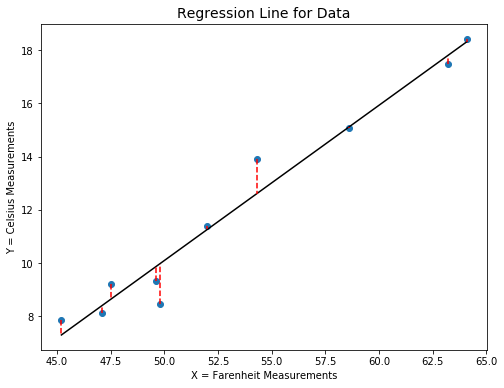

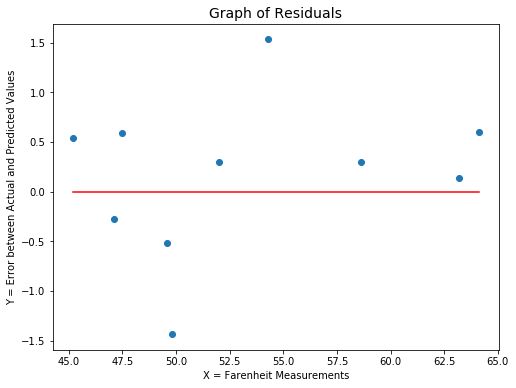

In [14]:
plt.figure(figsize=(8,6))
plt.title("Regression Line for Data",fontsize=14)
plt.xlabel("X = Farenheit Measurements")
plt.ylabel("Y = Celsius Measurements")
Yhat = [0.5836 * x - 19.0844 for x in X ]
plt.scatter(X,Y)
plt.plot(X,Yhat,color='black')
for k in range(len(X)):
    plt.plot([X[k],X[k]],[Y[k],Yhat[k]], '--', color='red')
plt.show()

E = [0.5399,-0.274,0.5877,-0.5188,-1.4347,0.2941,1.5323,0.2958,0.1317,0.6001]

plt.figure(figsize=(8,6))
plt.title("Graph of Residuals",fontsize=14)
plt.xlabel("X = Farenheit Measurements")
plt.ylabel("Y = Error between Actual and Predicted Values")
Yhat = [0 for x in X ]
plt.scatter(X,E)
plt.plot(X,Yhat,color='red')
print()

# Multiple Linear Regression

In multiple linear regression, we have $n\ge 2$ independent variables and seek a linear model
$$y_i = \theta_0 + \theta_1 x_1 +  \ldots +  \theta_n x_n + \epsilon_i$$

We will encode the parameters of a linear model in $n$ unknowns as $\theta = [\theta_0,\theta_1, \ldots, \theta_n]^T$, where $\theta_0$ is the bias, and encode data points $x_i$ as $[1,x_{i,1},\ldots,x_{i,n},y_i]$. A set of $m$ data points is thus encoded as a matrix 
$$X \,= \,\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \ldots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \ldots & x_{2,n} \\
&&\vdots &&\\
1 & x_{m,1} & x_{m,2} & \ldots & x_{m,n} \\
\end{bmatrix}
$$
and
$$Y \,= \,\begin{bmatrix}
 y_1\\
 y_2\\
\vdots \\
 y_m\\
\end{bmatrix}
$$
and the residuals as
$$E \,= \,\begin{bmatrix}
 \epsilon_1\\
 \epsilon_2\\
\vdots \\
 \epsilon_m\\
\end{bmatrix}.
$$

We thus have $Y = X\theta + E$ or
$$\begin{bmatrix}
 y_1\\
 y_2\\
\vdots \\
 y_m\\
\end{bmatrix} 
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \ldots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \ldots & x_{2,n} \\
&&\vdots &&\\
1 & x_{m,1} & x_{m,2} & \ldots & x_{m,n} \\
\end{bmatrix}
\times
\begin{bmatrix}
 \theta_0\\
 \theta_1\\
\vdots \\
 \theta_n\\
\end{bmatrix}
+
\begin{bmatrix}
 \epsilon_1\\
 \epsilon_2\\
\vdots \\
 \epsilon_m\\
\end{bmatrix}.
$$

The least-squares estimates for $\theta$ are given by the following formula:
$$\theta = 
\begin{bmatrix}
 \theta_0\\
 \theta_1\\
\vdots \\
 \theta_n\\
\end{bmatrix}
= (X^T X)^{-1}X^T Y
$$

In [15]:
def getTheta(X,Y):
    return inv(X.T @ X) @ X.T @ Y



[[1 2 4 7]
 [1 4 3 5]
 [1 5 3 4]
 [1 6 4 8]
 [1 5 8 7]]
[[1 2 4]
 [1 4 3]
 [1 5 3]
 [1 6 4]
 [1 5 8]
 [1 4 1]
 [1 1 2]
 [1 4 1]
 [1 3 4]]
[7 5 4 8 7 2 3 3 2]

Regression Plane:  y = 1.2314 + 0.3189 * x1 + 0.6358 * x2


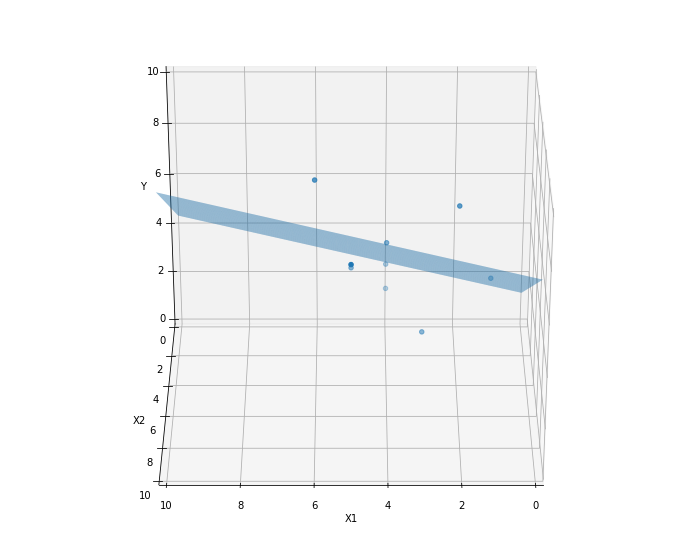

In [16]:
# Illustration of MLR in case of 2 independent variables


def multiple_regression(data,verbose=False):
    print(data[:5])
    
    Ones, X1, Y1, Z1 = zip(*data)
    
    X = data[:,:-1]
    Y = data[:,-1]
    if verbose:
        print(X)
        print(Y)
    Theta = getTheta(X,Y)

    print("\nRegression Plane:  y = " + str(round4(Theta[0])) + " + " 
                                          + str(round4(Theta[1])) + " * x1 + " 
                                          + str(round4(Theta[2])) + " * x2")

    lim = 10
    X = np.arange(0, lim+0.1, 0.1)
    Y = np.arange(0, lim+0.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros_like(X)
    for r in range(len(Z)):
        for c in range(len(Z[0])):
            Z[r][c] = Theta[0] + Theta[1]*X[r][c] + Theta[2]*Y[r][c]


    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=30, azim=90)

    # Plot the surface.
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_zlim(0,10)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Y")
    ax.scatter(X1,Y1,Z1)
    ax.plot_surface(X,Y,Z,alpha=0.5)
    #ax.plot(a,np.zeros(len(a)),b,c='r')

    plt.show()

data = np.array([[1,2,4,7],[1,4,3,5],[1,5,3,4],[1,6,4,8],[1,5,8,7],[1,4,1,2],[1,1,2,3],[1,4,1,3],[1,3,4,2]])

multiple_regression(data,verbose=True)

### Example: Height of Students and Parents

In this example we will investigate the regression plane which models the height of students (Y)
based on the height of their parents (X1 = mother's height, X2 = father's height)

In [18]:
studs = pd.read_csv("https://www.cs.bu.edu/fac/snyder/cs237/Data/height2D.txt", sep='\t')
print("Number of data points: " + str(len(studs)))
print(studs[:5])
studs['Height'][0]

HTTPError: HTTP Error 404: Not Found

In [ ]:
# put the data into the appropriate form [(1 x1 x2 y) ....]

data2 = []

for k in range(len(studs)):
    data2.append( [1, studs['momheight'][k], studs['dadheight'][k],studs['Height'][k],])
    
data2 = np.array(data2)

data2[:5]

In [ ]:
multiple_regression(data2)

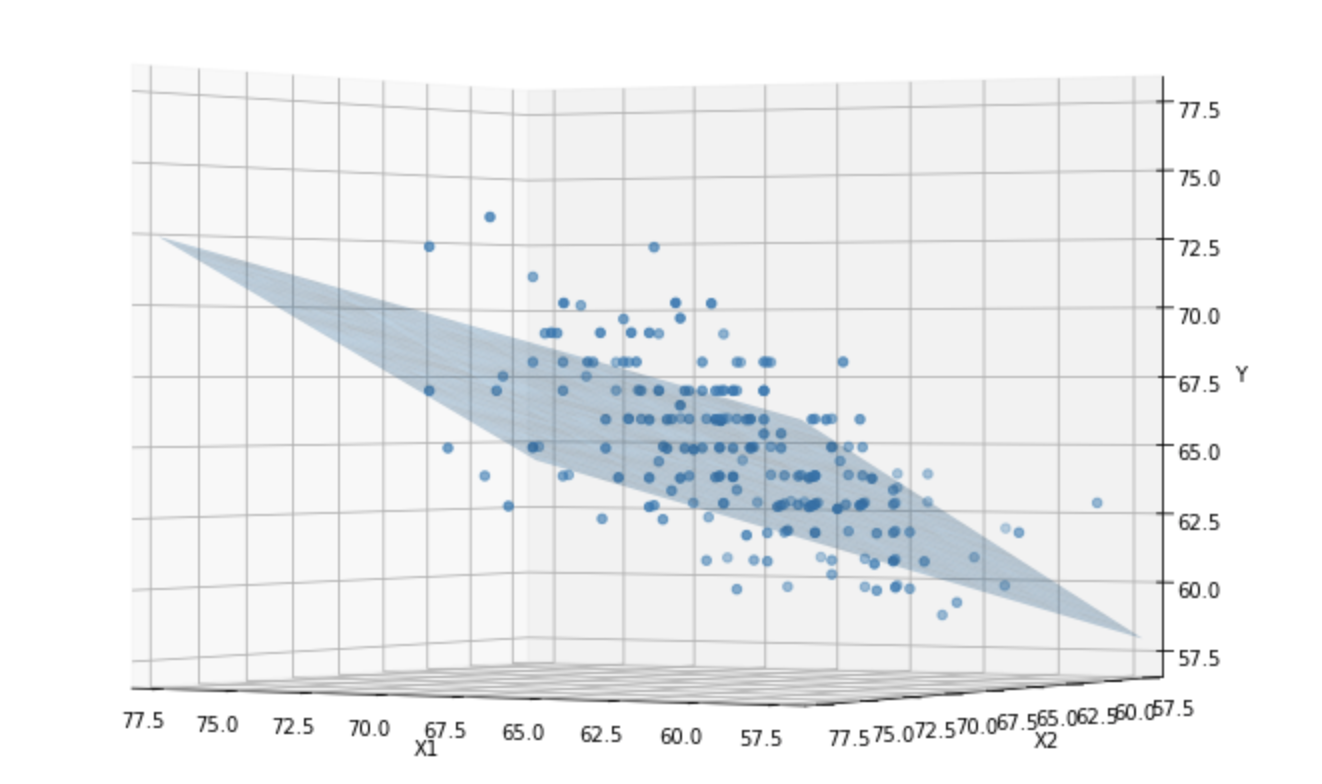

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def display2D(x,y):
    fig = plt.figure(figsize=(12,12))
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

    ax_main.scatter(x,y,marker='.',)
    ax_main.set(xlabel="x data", ylabel="y data")

    ax_xDist.hist(x,bins=100,align='mid',edgecolor='black')
    ax_xDist.set(ylabel='count')

    ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid',edgecolor='black')
    ax_yDist.set(xlabel='count')

    plt.show()

x = np.random.beta(2,5,size=int(1e4))
y = np.random.randn(int(1e4))

display2D(x,y)